# Data exploration and transformation for jobspy query output

In this notebook, the output from Jobspy will be explored and cleaned in a way that will be general for the processing of the data.

## General goal

The general goal of the dashboard is to viasually analyse the status of the job market in a specific (or various) European countries and per industry (or job title). For doing this, an open-source library [(JobSpy)](https://github.com/cullenwatson/JobSpy) is used to scrape data from the most popular job-posting sites, **Indeed** and **Glassdoor**.

THe first step is to check what is the data that is gathered from the query, to select the interesting or most populated features, and to remove duplicates between pages.

In [213]:
from jobspy import scrape_jobs

In [214]:
country = 'Germany'
jobs = scrape_jobs(
    site_name=[
        "indeed",
        "glassdoor"
    ],
    search_term="data science",
    location=country,
    results_wanted=200,
    hours_old=72,
    country_indeed=country
)

2025-02-18 00:56:15,326 - INFO - JobSpy:Indeed - search page: 1 / 2
2025-02-18 00:56:16,578 - INFO - JobSpy:Indeed - search page: 2 / 2
2025-02-18 00:56:16,796 - INFO - JobSpy:Glassdoor - search page: 1 / 7
2025-02-18 00:56:17,004 - INFO - JobSpy:Indeed - found no jobs on page: 2
2025-02-18 00:56:17,005 - INFO - JobSpy:Indeed - finished scraping
2025-02-18 00:56:18,143 - INFO - JobSpy:Glassdoor - search page: 2 / 7
2025-02-18 00:56:19,460 - INFO - JobSpy:Glassdoor - search page: 3 / 7
2025-02-18 00:56:20,533 - INFO - JobSpy:Glassdoor - search page: 4 / 7
2025-02-18 00:56:21,210 - INFO - JobSpy:Glassdoor - finished scraping


In [215]:
jobs.head(10)

,id,site,job_url,job_url_direct,title,company,location,date_posted,job_type,salary_source,...,emails,description,company_industry,company_url,company_logo,company_url_direct,company_addresses,company_num_employees,company_revenue,company_description
0,gd-1009641213697,glassdoor,https://www.glassdoor.de/job-listing/j?jl=1009...,NaN,Promotion Medizininformatik - Machine Learning...,Medizinische Hochschule Brandenburg Campus GmbH,Brandenburg an der Havel,2025-02-18,NaN,NaN,...,NaN,**Wir suchen SIE! Jetzt bewerben und Teil unse...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,gd-1009641372266,glassdoor,https://www.glassdoor.de/job-listing/j?jl=1009...,NaN,(Junior) Data Engineer,Raisin,Berlin,2025-02-18,NaN,NaN,...,NaN,Team\n \n \n\nThe Risk Controlling \& Regula...,NaN,https://www.glassdoor.de/Overview/W-EI_IE11446...,https://media.glassdoor.com/sql/1144673/raisin...,NaN,NaN,NaN,NaN,NaN
2,gd-1009640816236,glassdoor,https://www.glassdoor.de/job-listing/j?jl=1009...,NaN,Duales Studium Wirtschaftsinformatik - Sales &...,Europa-Park GmbH & Co Mack KG,Rust,2025-02-18,NaN,NaN,...,ausbildung@europapark.de,Arbeiten im Europa\-Park Erlebnis\-Resort – Da...,NaN,https://www.glassdoor.de/Overview/W-EI_IE93193...,https://media.glassdoor.com/sql/931937/europa-...,NaN,NaN,NaN,NaN,NaN
3,gd-1009641107621,glassdoor,https://www.glassdoor.de/job-listing/j?jl=1009...,NaN,Data Analyst with ML Experience (w/m/d),Billie,Berlin,2025-02-18,NaN,NaN,...,NaN,"We are Billie, the leading provider of Buy Now...",NaN,https://www.glassdoor.de/Overview/W-EI_IE36001...,https://media.glassdoor.com/sql/3600131/billie...,NaN,NaN,NaN,NaN,NaN
4,gd-1009641027823,glassdoor,https://www.glassdoor.de/job-listing/j?jl=1009...,NaN,R&D Quality Assurance Tester Intern,Cyntegrity Germany GmbH,Deutschland,2025-02-18,NaN,NaN,...,NaN,"Join Cyntegrity as an intern, one of the leadi...",NaN,https://www.glassdoor.de/Overview/W-EI_IE23969...,https://media.glassdoor.com/sql/2396996/cynteg...,NaN,NaN,NaN,NaN,NaN
5,gd-1009641344282,glassdoor,https://www.glassdoor.de/job-listing/j?jl=1009...,NaN,Junior Data Scientist,one.five GmbH,NaN,2025-02-18,NaN,NaN,...,NaN,#### **The Role**\n\n\nWe are seeking a Data S...,NaN,https://www.glassdoor.de/Overview/W-EI_IE28011...,https://media.glassdoor.com/sql/2801104/one-fi...,NaN,NaN,NaN,NaN,NaN
6,gd-1009641063140,glassdoor,https://www.glassdoor.de/job-listing/j?jl=1009...,NaN,Praktikum: Data Science Engineer for AI-driven...,etalytics GmbH,Darmstadt,2025-02-18,NaN,NaN,...,NaN,"Du möchtest nicht nur zuschauen, sondern mit d...",NaN,https://www.glassdoor.de/Overview/W-EI_IE60670...,https://media.glassdoor.com/sql/6067080/etalyt...,NaN,NaN,NaN,NaN,NaN
7,gd-1009641084657,glassdoor,https://www.glassdoor.de/job-listing/j?jl=1009...,NaN,"Data Scientist - (Logistics, Choice)",Delivery Hero,Berlin,2025-02-18,NaN,NaN,...,NaN,**Company Description** \n\nAs the world’s pi...,NaN,https://www.glassdoor.de/Overview/W-EI_IE50455...,https://media.glassdoor.com/sql/504556/deliver...,NaN,NaN,NaN,NaN,NaN
8,gd-1009640924283,glassdoor,https://www.glassdoor.de/job-listing/j?jl=1009...,NaN,Research Assistant/Associate (f/m/d) - Mobilit...,RWTH Aachen,Aachen,2025-02-18,NaN,NaN,...,NaN,**PhD position**\n----------------\n\n### **Co...,NaN,https://www.glassdoor.de/Overview/W-EI_IE31774...,https://media.glassdoor.com/sql/3177436/rwth-a...,NaN,NaN,NaN,NaN,NaN
9,gd-1009641310475,glassdoor,https://www.glassdoor.de/job-listing/j?jl=1009...,NaN,INTERNSHIP - AI SAFETY ANALYSIS (VISION-BASED ...,Synapticon,Schönaich,2025-02-18,NaN,NaN,...,NaN,**HACKING THE PHYSICS AND ECONOMICS OF MOTION ...,NaN,https://www.glassdoor.de/Overview/W-EI_IE18549...,https://media.glassdoor.com/sql/1854943/synapt...,NaN,NaN,NaN,NaN,NaN


In [216]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     146 non-null    object 
 1   site                   146 non-null    object 
 2   job_url                146 non-null    object 
 3   job_url_direct         75 non-null     object 
 4   title                  146 non-null    object 
 5   company                145 non-null    object 
 6   location               141 non-null    object 
 7   date_posted            146 non-null    object 
 8   job_type               55 non-null     object 
 9   salary_source          3 non-null      object 
 10  interval               3 non-null      object 
 11  min_amount             3 non-null      float64
 12  max_amount             3 non-null      float64
 13  currency               3 non-null      object 
 14  is_remote              146 non-null    bool   
 15  job_le

We are interested in checking and analysing the description, among others. Therefore, empty descriptions should be removed:

In [217]:
empty_des = jobs.loc[jobs.description.isna()].index
jobs.drop(empty_des, axis=0, inplace=True)

In [218]:
# Select columns with non-null values and drop the ones not having full rows
cols = ['id','site', 'title', 'company', 'location', 'date_posted', 'job_url', 'description']
jobs_red = jobs[cols].dropna().reset_index(drop=True)

In [219]:
jobs_red

,id,site,title,company,location,date_posted,job_url,description
0,gd-1009641213697,glassdoor,Promotion Medizininformatik - Machine Learning...,Medizinische Hochschule Brandenburg Campus GmbH,Brandenburg an der Havel,2025-02-18,https://www.glassdoor.de/job-listing/j?jl=1009...,**Wir suchen SIE! Jetzt bewerben und Teil unse...
1,gd-1009641372266,glassdoor,(Junior) Data Engineer,Raisin,Berlin,2025-02-18,https://www.glassdoor.de/job-listing/j?jl=1009...,Team\n \n \n\nThe Risk Controlling \& Regula...
2,gd-1009640816236,glassdoor,Duales Studium Wirtschaftsinformatik - Sales &...,Europa-Park GmbH & Co Mack KG,Rust,2025-02-18,https://www.glassdoor.de/job-listing/j?jl=1009...,Arbeiten im Europa\-Park Erlebnis\-Resort – Da...
3,gd-1009641107621,glassdoor,Data Analyst with ML Experience (w/m/d),Billie,Berlin,2025-02-18,https://www.glassdoor.de/job-listing/j?jl=1009...,"We are Billie, the leading provider of Buy Now..."
4,gd-1009641027823,glassdoor,R&D Quality Assurance Tester Intern,Cyntegrity Germany GmbH,Deutschland,2025-02-18,https://www.glassdoor.de/job-listing/j?jl=1009...,"Join Cyntegrity as an intern, one of the leadi..."
...,...,...,...,...,...,...,...,...
135,in-2ada067226eb56a4,indeed,R&D Quality Assurance Tester Intern,Cyntegrity Germany GmbH,DE,2025-02-07,https://de.indeed.com/viewjob?jk=2ada067226eb56a4,"Join Cyntegrity as an intern, one of the leadi..."
136,in-fa946e24d8412885,indeed,Software ABAP Entwickler / Technischer Berater...,Huf Hülsbeck & Fürst GmbH & Co. KG,"Velbert, NW, DE",2025-02-07,https://de.indeed.com/viewjob?jk=fa946e24d8412885,**We are a leading developer and manufacturer ...
137,in-da33b8db9a993088,indeed,Data Science Intern,Cyntegrity Germany GmbH,DE,2025-01-16,https://de.indeed.com/viewjob?jk=da33b8db9a993088,"Join Cyntegrity as an intern, one of the leadi..."
138,in-3582fa57e8148cac,indeed,Team Leader (m/f/d) Network & Security Services,Hager Group,"Blieskastel, SL, DE",2024-12-13,https://de.indeed.com/viewjob?jk=3582fa57e8148cac,**Why join the** **Digital \& Information** **...


In [220]:
jobs_red.groupby('site').count()

,id,title,company,location,date_posted,job_url,description
site,,,,,,,
glassdoor,66,66,66,66,66,66,66
indeed,74,74,74,74,74,74,74


In [221]:
duplicates = jobs_red[['company', 'title']].duplicated()
dup_df = jobs_red.loc[duplicates]
dup_df.groupby('site').count()

,id,title,company,location,date_posted,job_url,description
site,,,,,,,
indeed,53,53,53,53,53,53,53


In [222]:
remove_index = []
for index, row in dup_df.iterrows():
    temp_dup = jobs_red.loc[(jobs_red.company==row['company']) & (jobs_red.title==row['title'])]
    # If there are duplicates between sites, remove glassdoor:
    if (('indeed' in temp_dup['site'].unique()) & ('glassdoor' in temp_dup['site'].unique())):
        remove_index.append(temp_dup.loc[temp_dup['site']=='glassdoor'].index.item())
print(remove_index)

[38, 16, 1, 46, 11, 8, 24, 45, 26, 10, 35, 39, 31, 42, 3, 32, 43, 6, 5, 21, 25, 33, 7, 19, 41, 2, 36, 32, 9, 28, 29, 47, 14, 14, 48, 30, 63, 62, 61, 65, 55, 59, 60, 58, 55, 60, 53, 56, 64, 4, 49, 13, 20]


In [223]:
jobs_red.loc[remove_index,:]

,id,site,title,company,location,date_posted,job_url,description
38,gd-1009641476519,glassdoor,Software Development Engineer II (f/m/d),Clario,Estenfeld,2025-02-18,https://www.glassdoor.de/job-listing/j?jl=1009...,Are you seeking a purposeful and rewarding Sof...
16,gd-1009641395455,glassdoor,(Junior) Data Engineer,Raisin GmbH,Deutschland,2025-02-18,https://www.glassdoor.de/job-listing/j?jl=1009...,#### **Team**\n\n\nThe Risk Controlling \& Reg...
1,gd-1009641372266,glassdoor,(Junior) Data Engineer,Raisin,Berlin,2025-02-18,https://www.glassdoor.de/job-listing/j?jl=1009...,Team\n \n \n\nThe Risk Controlling \& Regula...
46,gd-1009641339382,glassdoor,(Senior) Site Reliability Engineer (SRE) m/f/d...,Temedica GmbH,München,2025-02-18,https://www.glassdoor.de/job-listing/j?jl=1009...,#### **Let's win together**\n\n\nOur company i...
11,gd-1009641315161,glassdoor,Junior Data Scientist (m/w/d),Kaufland,Heilbronn,2025-02-18,https://www.glassdoor.de/job-listing/j?jl=1009...,**Externe Stellenbeschreibung**\n-------------...
8,gd-1009641310475,glassdoor,INTERNSHIP - AI SAFETY ANALYSIS (VISION-BASED ...,Synapticon,Schönaich,2025-02-18,https://www.glassdoor.de/job-listing/j?jl=1009...,**HACKING THE PHYSICS AND ECONOMICS OF MOTION ...
24,gd-1009641284193,glassdoor,Software Engineer (m/f/d) temporary until Nove...,AstraZeneca,München,2025-02-18,https://www.glassdoor.de/job-listing/j?jl=1009...,**Shape the Future of Precision Medicine – Joi...
45,gd-1009641263350,glassdoor,Research Associate / Wissenschaftliche*r Mitar...,Technische Universität Hamburg,Hamburg,2025-02-18,https://www.glassdoor.de/job-listing/j?jl=1009...,Research Associate/\n \nWissenschaftliche\*r ...
26,gd-1009641244728,glassdoor,Post doctoral researcher in Medical bioinforma...,Universitätsklinikum Freiburg,Freiburg,2025-02-18,https://www.glassdoor.de/job-listing/j?jl=1009...,The Institute of Medical Bioinformatics and Sy...
10,gd-1009641223710,glassdoor,Team Lead SAP Data Science (all genders),consolut international ag,Deutschland,2025-02-18,https://www.glassdoor.de/job-listing/j?jl=1009...,Team Lead SAP Data Science – is that you?\n\n\...


In [224]:
final_jobs = jobs_red.drop(remove_index, axis=0)

In [225]:
final_jobs.drop('site', axis=1, inplace=True)

Location in glassdoor contains city, region and country code. Let's divide this in city and country (coming from selected query in jobspy)

In [226]:
final_jobs['city'] = final_jobs['location'].str.split(',').str[0]
final_jobs['country'] = country
final_jobs.drop('location', axis=1, inplace=True)

In [227]:
final_jobs.groupby('city').count()

,id,title,company,date_posted,job_url,description,country
city,,,,,,,
Aachen,5,5,5,5,5,5,5
Aalen,1,1,1,1,1,1,1
Berlin,15,15,15,15,15,15,15
Berlin-Friedrichshain,1,1,1,1,1,1,1
Berlin-Kreuzberg,2,2,2,2,2,2,2
Biberach an der Riß,2,2,2,2,2,2,2
Blieskastel,2,2,2,2,2,2,2
Brandenburg an der Havel,1,1,1,1,1,1,1
DE,5,5,5,5,5,5,5


In [228]:
final_jobs.head()

,id,title,company,date_posted,job_url,description,city,country
0,gd-1009641213697,Promotion Medizininformatik - Machine Learning...,Medizinische Hochschule Brandenburg Campus GmbH,2025-02-18,https://www.glassdoor.de/job-listing/j?jl=1009...,**Wir suchen SIE! Jetzt bewerben und Teil unse...,Brandenburg an der Havel,Germany
12,gd-1009641032280,Solution Engineering & Data Science Intern (m/...,Bliro GmbH,2025-02-18,https://www.glassdoor.de/job-listing/j?jl=1009...,You want to...\n\n* join a scaling Start\-Up i...,München,Germany
15,gd-1009641476877,"Software Development Engineer, S3",Amazon Web Services Development Center Germany...,2025-02-18,https://www.glassdoor.de/job-listing/j?jl=1009...,\- Experience (non\-internship) in professiona...,Berlin,Germany
17,gd-1009351780868,Junior Softwareentwickler*in (m/w/d) Erforschu...,ITS Gruppe,2025-02-18,https://www.glassdoor.de/job-listing/j?jl=1009...,##### **Bei uns steht der Mensch im Mittelpunk...,Dortmund,Germany
18,gd-1009641341889,Clinical Data Engineer,BI Pharma GmbH&Co.KG,2025-02-18,https://www.glassdoor.de/job-listing/j?jl=1009...,**The Position**\n----------------\n\nBiostati...,Biberach an der Riß,Germany


In [229]:
final_jobs.dtypes

id             object
title          object
company        object
date_posted    object
job_url        object
description    object
city           object
country        object
dtype: object

print(f"""
    Lengths for setting VARCHAR length in database: \n
    Title:\n {final_jobs.title.str.len().describe()} \n
    Company:\n {final_jobs.company.str.len().describe()} \n
    URL:\n {final_jobs.job_url.str.len().describe()} \n
    Description:\n {final_jobs.description.str.len().describe()} \n
    """)

Transforming the decription requires removing the markdown formating and unifying the language. Some description might be in a different language depending on the country we are querying, even if the search term is in English. To solve this problem and have a better overview of the descriptions in spite of the language, first the language of the description will be detected and then translated to English. In addition, the language of the ad will also be added as a feature.

In [230]:
# Remove markdown
# Dictionary of regex patterns to remove specific Markdown elements
markdown_removal_patterns = {
    r'(\*{1,2}|_{1,2})(.*?)\1': r'\2',  # Remove bold (**text**, __text__) and italics (*text*, _text_)
    r'\[([^\]]+)\]\([^)]+\)': r'\1',    # Remove links, keeping only the text
    r'https?://\S+': '',                # Remove standalone URLs
    r'\n': ' ',                         # Remove newlines and replace with a space
    r'\\': '',
    r'#': '',
    r'\*': ''
}

final_jobs['description'].replace(markdown_removal_patterns, regex=True, inplace=True)

/var/folders/tn/__jkvfl15hz0hrlfh0307zkr0000gn/T/ipykernel_18922/2286569557.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_jobs['description'].replace(markdown_removal_patterns, regex=True, inplace=True)


In [231]:
# Detect language
from langdetect import detect

final_jobs['description_language'] = final_jobs.description.apply(lambda x: detect(x)).values

In [232]:
final_jobs.loc[final_jobs['description_language']!='en'].index

Index([  0,  17,  22,  37,  40,  54,  68,  73,  81,  82,  84,  86,  88,  90,
        91,  92, 101, 102, 104, 107],
      dtype='int64')

In [233]:
final_jobs.description.loc[final_jobs.description=='']

Series([], Name: description, dtype: object)

In [234]:
# Translate
from googletrans import Translator

translator = Translator()
index_nonen = final_jobs.loc[final_jobs['description_language']!='en'].index

for desc in final_jobs.loc[index_nonen, 'description'].values:
    try:
        translator.translate(desc, dest='en').text
    except:
        print(desc.__class__.__name__)

def translate_exception(text):
    try:
        return translator.translate(x, dest='en').text
    except:
        return None

final_jobs.loc[index_nonen, 'description'] = final_jobs.loc[index_nonen, 'description'].apply(lambda x: translate_exception(x))

str
str


In [235]:
final_jobs.dropna(subset='description', inplace=True)

In [236]:
final_jobs

,id,title,company,date_posted,job_url,description,city,country,description_language
12,gd-1009641032280,Solution Engineering & Data Science Intern (m/...,Bliro GmbH,2025-02-18,https://www.glassdoor.de/job-listing/j?jl=1009...,You want to... join a scaling Start-Up in th...,München,Germany,en
15,gd-1009641476877,"Software Development Engineer, S3",Amazon Web Services Development Center Germany...,2025-02-18,https://www.glassdoor.de/job-listing/j?jl=1009...,- Experience (non-internship) in professional ...,Berlin,Germany,en
18,gd-1009641341889,Clinical Data Engineer,BI Pharma GmbH&Co.KG,2025-02-18,https://www.glassdoor.de/job-listing/j?jl=1009...,The Position ---------------- Biostatistics a...,Biberach an der Riß,Germany,en
23,gd-1009640928560,Internship – IT-Infrastructure (all genders) –...,MBition GmbH,2025-02-18,https://www.glassdoor.de/job-listing/j?jl=1009...,"Your Mission Join MBition, a 100% subsidiar...",Berlin,Germany,en
27,gd-1009641008394,PhD Candidate (m/f/d): Mass Spectrometry Imaging,Leibniz-Institut für Analytische Wissenschafte...,2025-02-18,https://www.glassdoor.de/job-listing/j?jl=1009...,The Leibniz-Institut für Analytische Wissensch...,Dortmund,Germany,en
...,...,...,...,...,...,...,...,...,...
135,in-2ada067226eb56a4,R&D Quality Assurance Tester Intern,Cyntegrity Germany GmbH,2025-02-07,https://de.indeed.com/viewjob?jk=2ada067226eb56a4,"Join Cyntegrity as an intern, one of the leadi...",DE,Germany,en
136,in-fa946e24d8412885,Software ABAP Entwickler / Technischer Berater...,Huf Hülsbeck & Fürst GmbH & Co. KG,2025-02-07,https://de.indeed.com/viewjob?jk=fa946e24d8412885,We are a leading developer and manufacturer of...,Velbert,Germany,en
137,in-da33b8db9a993088,Data Science Intern,Cyntegrity Germany GmbH,2025-01-16,https://de.indeed.com/viewjob?jk=da33b8db9a993088,"Join Cyntegrity as an intern, one of the leadi...",DE,Germany,en
138,in-3582fa57e8148cac,Team Leader (m/f/d) Network & Security Services,Hager Group,2024-12-13,https://de.indeed.com/viewjob?jk=3582fa57e8148cac,Why join the Digital & Information department?...,Blieskastel,Germany,en


Load data into a sqlite database

In [243]:
import sqlite3

conn = sqlite3.connect("jobs.db")
cursor = conn.cursor()
# DROP TABLE
#cursor.execute("DROP TABLE jobspy")
#conn.commit()

# Create jobs table
cursor.execute("""
    CREATE TABLE IF NOT EXISTS jobspy (
        id TEXT PRIMARY KEY,
        title TEXT,
        company TEXT,
        date_posted TEXT,
        job_url TEXT,
        description TEXT,
        city TEXT,
        country TEXT,
        description_language TEXT
    )
""")
conn.commit()

In [244]:
final_jobs.to_sql(
    "jobspy",
    conn,
    if_exists='append',
    index=False,
)

71

In [245]:
%load_ext sql
%sql sqlite:///jobs.db
%config SqlMagic.style = '_DEPRECATED_DEFAULT'

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [246]:
%sql SELECT * FROM jobspy;

 * sqlite:///jobs.db
Done.


[('gd-1009641032280', 'Solution Engineering & Data Science Intern (m/f/d)', 'Bliro GmbH', '2025-02-18', 'https://www.glassdoor.de/job-listing/j?jl=1009641032280', 'You want to...   join a scaling Start-Up in the heart of Europe?  create a category-defining company?  build something people really want?   Then thi ... (2931 characters truncated) ... The opportunity to shape a fast-growing, innovative SaaS company.  A collaborative, remote-first culture with plenty of room for professional growth.', 'München', 'Germany', 'en'),
 ('gd-1009641476877', 'Software Development Engineer, S3', 'Amazon Web Services Development Center Germany GmbH', '2025-02-18', 'https://www.glassdoor.de/job-listing/j?jl=1009641476877', "- Experience (non-internship) in professional software development - Experience designing or architecting (design patterns, reliability and scaling)  ... (4707 characters truncated) ... nboarding process, please visit  for more information. If the country/region you’re applying in isn’t listed, please contact your Recruiting Partner.", 'Berlin', 'Germany', 'en'),
 ('gd-1009641341889', 'Clinical Data Engineer', 'BI Pharma GmbH&Co.KG', '2025-02-18', 'https://www.glassdoor.de/job-listing/j?jl=1009641341889', 'The Position ----------------  Biostatistics and Data Sciences (BDS) is a global organization with more than 400 employees within the Human Pharma Bu ... (4255 characters truncated) ... g is online until 17th March, 2025.     2. Virtual interviews start taking place mid of March 2025. 3. On-site Interviews starting end of March 2025.', 'Biberach an der Riß', 'Germany', 'en'),
 ('gd-1009640928560', 'Internship – IT-Infrastructure (all genders) – in Berlin', 'MBition GmbH', '2025-02-18', 'https://www.glassdoor.de/job-listing/j?jl=1009640928560', 'Your Mission    Join MBition, a 100% subsidiary of Mercedes-Benz, and become an integral part of our IT Infrastructure team, driving impactful commun ... (2498 characters truncated) ... eople with health impairments to apply to our jobs! Our building and workplaces offer the possibilities to adjust to different employee requirements.', 'Berlin', 'Germany', 'en'),
 ('gd-1009641008394', 'PhD Candidate (m/f/d): Mass Spectrometry Imaging', 'Leibniz-Institut für Analytische Wissenschaften - ISAS - e.V.', '2025-02-18', 'https://www.glassdoor.de/job-listing/j?jl=1009641008394', 'The Leibniz-Institut für Analytische Wissenschaften - ISAS - e. V. develops efficient analytical methods for health research. Thus, it contributes to ... (4439 characters truncated) ... reference number 342_2025) are welcome and can be directed to the Human Resources team (). Further information about the institute can be found at: .', 'Dortmund', 'Germany', 'en'),
 ('gd-1009641056096', 'Technical Project Manager (m/f/d)', 'Ververica GmbH', '2025-02-18', 'https://www.glassdoor.de/job-listing/j?jl=1009641056096', "About Ververica   Ververica, founded by the original creators of Apache Flink™, empowers businesses to unlock the full potential of real-time data pr ... (4118 characters truncated) ... assionate about streaming data, and software development and want to make a significant impact at a leading tech company, we'd love to hear from you.", 'Frankfurt am Main', 'Germany', 'en'),
 ('gd-1009641134787', 'Team Leader (m/f/d) Network & Security Services', 'Hager Electro GmbH & Co. KG', '2025-02-18', 'https://www.glassdoor.de/job-listing/j?jl=1009641134787', "Why join the Digital & Information department?  As a central player in the company, the Digital & Information function plays a strategic role in our  ... (3345 characters truncated) ... Interview will be then organized with the N+2 & the HR manager   Our success relies on collective energy. Apply now and power up your future with us!", 'Blieskastel', 'Germany', 'en'),
 ('gd-1009639659373', 'Senior Data Analyst', 'inDrive', '2025-02-16', 'https://www.glassdoor.de/job-listing/j?jl=1009639659373', 'Cyprus, Limassol · Kazakhstan · Georgia · Germany Hybrid Full-ti

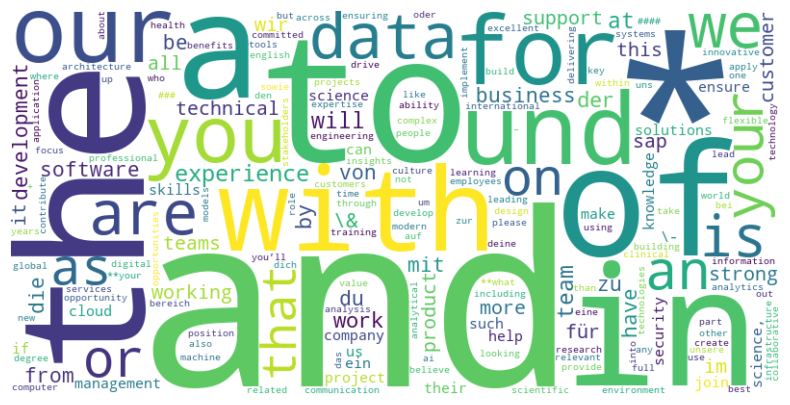

In [205]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Fetch all job descriptions
df = pd.read_sql_query("SELECT * FROM jobspy", conn)

# Count words in all descriptions
all_text = " ".join(df["description"]).lower().split()
word_freq = Counter(all_text)

# Convert to DataFrame for easy plotting
word_freq_df = pd.DataFrame(word_freq.items(), columns=["Word", "Count"])
word_freq_df = word_freq_df.sort_values(by="Count", ascending=False)

# Plot word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Wordcount and various data extraction from job description

Now we have the cleaned dataframe for the output query. This would be the transformation stage that happens BEFORE visualization? The questions that the dashboard should answer are the following:

* How often are different cloud technologies mentioned in the job descriptions? (FuzzyWuzzy, AWS, GCP, AZURE)
* Programming languages?
* Is experience mentioned?
* How similar are the ads between them?
* Word frequency in job title?